In [21]:
import pandas as pd

file_path = 'Downloads/Electric_Vehicle_Population_Data.csv'  
df = pd.read_csv(file_path)

df["Electric Range"]

0          75.0
1         270.0
2           0.0
3          25.0
4          19.0
          ...  
216767     38.0
216768     33.0
216769      0.0
216770     38.0
216771      0.0
Name: Electric Range, Length: 216772, dtype: float64

In [25]:
df_subset = df[['Model', 'Electric Range']]
df_subset

,Model,Electric Range
0,LEAF,75.0
1,MODEL S,270.0
2,ID.4,0.0
3,PRIUS PRIME,25.0
4,C-MAX,19.0
...,...,...
216767,VOLT,38.0
216768,NIRO,33.0
216769,MODEL Y,0.0
216770,VOLT,38.0


In [35]:
import numpy as np
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)
df = df.dropna(subset=['Electric Range'])


In [67]:
df_subset = df[['Model', 'Electric Range']]

max_range_index = df_subset['Electric Range'].idxmax()

max_range_row = df_subset.loc[max_range_index]

print("Model with the longest electric range:")
print("Model:", max_range_row['Model'])
print("Electric Range:", max_range_row['Electric Range'], "miles")

min_range_index = df_subset['Electric Range'].idxmin()

min_range_row = df_subset.loc[min_range_index]

print("Model with the shortest electric range:")
print("Model:", min_range_row['Model'])
print("Electric Range:", min_range_row['Electric Range'], "miles")


Model with the longest electric range:
Model: MODEL S
Electric Range: 337.0 miles
Model with the shortest electric range:
Model: PRIUS PLUG-IN
Electric Range: 6.0 miles


In [51]:
bins = [0, 100, 200, 300, float('inf')] 
labels = ['Short-Range(0-100)', 'Mid-Range(101-200)', 'Long-Range(201-300)', 'Ultra-Range(301+)']  

df['Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels, right=True)

print(df[['Model', 'Electric Range', 'Range Category']].head(11))


          Model  Electric Range       Range Category
0          LEAF            75.0   Short-Range(0-100)
1       MODEL S           270.0  Long-Range(201-300)
3   PRIUS PRIME            25.0   Short-Range(0-100)
4         C-MAX            19.0   Short-Range(0-100)
5       MODEL 3           266.0  Long-Range(201-300)
6       MODEL S           249.0  Long-Range(201-300)
7      WRANGLER            21.0   Short-Range(0-100)
8            X3            17.0   Short-Range(0-100)
9          LEAF            73.0   Short-Range(0-100)
10      MODEL 3           322.0    Ultra-Range(301+)
11         LEAF            75.0   Short-Range(0-100)


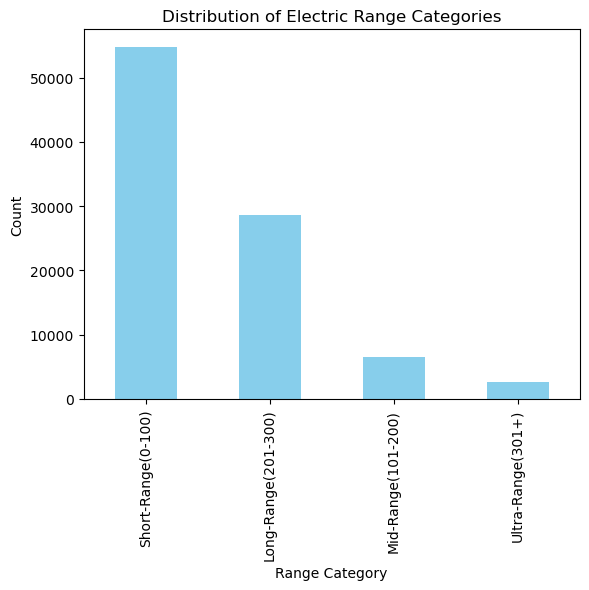

In [53]:
import matplotlib.pyplot as plt

df['Range Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Electric Range Categories")
plt.xlabel("Range Category")
plt.ylabel("Count")
plt.show()


In [41]:
missing_count = df[df['Electric Range'] == 0].shape[0]
print(f"Number of rows with missing or invalid Electric Range: {missing_count}")


Number of rows with missing or invalid Electric Range: 0


In [55]:
df['Electric Range'] = df['Electric Range'].replace(0, np.nan)

median_range = df['Electric Range'].median()
df['Electric Range'] = df['Electric Range'].fillna(median_range)


Correlation between Electric Range and Model Year: -0.16


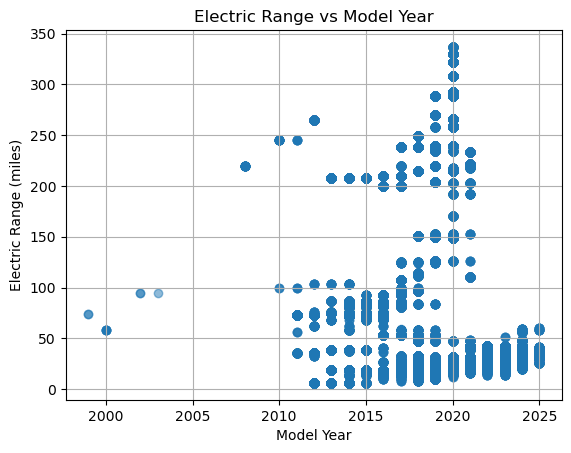

In [69]:
correlation_matrix = df[['Electric Range', 'Model Year']].corr()  
correlation = correlation_matrix.loc['Electric Range', 'Model Year']  
print("Correlation between Electric Range and Model Year:", round(correlation, 2))  

import matplotlib.pyplot as plt

plt.scatter(df['Model Year'], df['Electric Range'], alpha=0.5)  
plt.title("Electric Range vs Model Year") 
plt.xlabel("Model Year")  
plt.ylabel("Electric Range (miles)") 
plt.grid(True)  
plt.show()  

